In [1]:
## library(igraph)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggrepel)
library(ggbeeswarm)
library(patchwork)
library(writexl)
options(ggrepel.max.overlaps = Inf)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
cgsf_all = qs::qread('_targets/objects/combined_gost_seurat_formatted')
cgsf_all %>% head(1)

tag                                                                   
1 Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none
  data_day cluster fgf1_day fgf1_comparison bl6_day bl6_comparison grouping    
1 all      Agrp    Day14    obob14v14       Day14   obobBL6d14     bl6_grouping
  cells_a cells_b ⋯ recall    term_id    source term_name                 
1 neg     none    ⋯ 0.1072706 GO:0007399 GO:BP  nervous system development
  effective_domain_size source_order parents   
1 26856                 2951         GO:0048731
  evidence_codes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1 ISO,IEA,ISS ISO IEA,IDA IBA,IEA,IMP,ISS,IEA,IMP IGI,IEA,IDA IMP ISO IBA IEA,ISO IBA IEA,IDA,IBA,IDA IMP ISO IEA,IDA IMP IEA,ISO IEA,IDA IMP ISS IEA,IMP IGI,ISO,IMP IEA,ISS ISO IBA IEA,IEA,ISS IEA,ISS ISO IBA IEA,IDA,IMP,IMP,IMP IEA,IMP IGI IBA,IMP ISS ISO IEA,IMP ISS ISO IBA IEA,IMP IGI IEP ISO IBA TAS NAS IEA,IEA,IDA IMP IEA,ISO IEA,IEA,IDA ISO IEA,ISO IBA IEA,IMP,IMP IBA IEA,IDA ISO IBA IEA,ISS ISO IEA,IDA IGI IEA,IMP ISO IBA IEA,IMP IEA,IGI ISO IEA,ISS ISO,IDA IMP ISO IBA IEA,IDA IEA,IMP ISS ISO IEA,IDA IBA,IGI ISS ISO IBA IEA,IMP,IGI,IBA,IDA IMP IGI ISO IBA IEA,IDA IMP,IMP,IDA IMP IGI ISO IBA IEA,IEA,IMP IEA,ISO IBA IEA,IMP,IDA IMP ISO IBA IEA,ISS ISO IEA,IDA IMP ISO IBA IEA,IDA IMP ISS ISO IBA IEA,IMP,IMP,IMP IBA NAS IEA,IMP,IMP,IMP IGI IEP TAS IEA,IMP,IMP IGI ISO IBA IEA,IMP IBA,ISO,IMP,ISO IEA,IMP,IDA IMP IGI ISO IEA,ISO IEA,IMP IGI,IDA IMP IGI IBA,IBA,IDA IBA IEA,IEA,IMP,IMP,ISO,IBA,IMP,IDA,IBA IEA,IDA IGI,IDA ISO IEA,IMP,IDA IMP IGI ISO IBA IEA,IMP IBA,ISO IEA,IBA,IDA IMP ISO IEA,ISO IEA,IMP ISO,IBA,IGI IBA,IEA,IMP ISS ISO NAS,IDA IMP IEA,IBA,IMP ISO,IMP,IMP,IMP,IMP IBA,IMP,IDA IMP IEA,ISS ISO IEA,IEA,IMP,IMP

In [3]:
combined_deg_seurat_all = qs::qread('_targets/objects/combined_deg_seurat_formatted')
combined_deg_seurat_all %>% head

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Rgs6,8.099718e-52,2.973614,0.920,0.754,1.619944e-48,ENSMUSG00000021219,142.1105
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Zfpm2,9.245582e-50,3.086717,0.918,0.789,1.849116e-46,ENSMUSG00000022306,141.1649
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Filip1,1.376679e-65,2.108025,0.991,0.891,2.753357e-62,ENSMUSG00000034898,129.7703
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Cntnap5c,4.355016e-60,2.159726,0.979,0.909,8.710032e-57,ENSMUSG00000038048,121.0742
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Grm7,1.592546e-53,2.197611,0.986,0.960,3.185092e-50,ENSMUSG00000056755,108.7749
Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,Agrp,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Tll1,2.828608e-38,3.153798,0.868,0.657,5.657217e-35,ENSMUSG00000053626,108.0094


In [4]:
nhgc = qs::qread('_targets/objects/nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14') # Astrocytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none
nhgc %>% group_by(fgf1_grouping) %>% summarise(n=n())
nhgc %>% group_by(restored_grouping) %>% summarise(n=n())
# don't worry about this now, just state all markers for all clusters you want

fgf1_grouping,n
<chr>,<int>
none,2123


restored_grouping,n
<fct>,<int>
none,2123


In [5]:
tag2 = combined_deg_seurat_all %>% 
    pull(tag) %>% unique %>%
    str_split(pattern = "___") %>%
    map_chr(~if (length(.x) >= 3) paste(.x[1:2], collapse = "___") else .x[1]) %>%
    unique
        
tag2_tibble = tag2 %>% tibble(tag2=.) %>%
mutate(path_to_target = paste0('_targets/objects/nhgc_', tag2)) %>%
mutate(obj = purrr::map(path_to_target, ~if (file.exists(.x)) qs::qread(.x) else NA))
    
combined_tibble <- tag2_tibble %>%
  mutate(obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y) else tibble())) %>%
  pull(obj) %>%
  map_dfr(identity)

Warning message:
“There were 62 warnings in `mutate()`.
The first warning was:
ℹ In argument: `obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y)
  else tibble())`.
Caused by warning in `if (!is.na(.x)) ...`:
! the condition has length > 1 and only the first element will be used
ℹ Run `dplyr::last_dplyr_warnings()` to see the 61 remaining warnings.”


In [6]:
library(dplyr)
library(tidyr)

# Tibble for fgf1_grouping
fgf1_tibble <- combined_tibble %>% 
  filter(fgf1_grouping %in% c('neg', 'none', 'pos')) %>%
  group_by(tag2, fgf1_grouping) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping, values_from = count, names_prefix = "fgf1_", values_fill = 0)

# Tibble for fgf1_grouping with _restored
restored_tibble <- combined_tibble %>% 
  mutate(fgf1_grouping_restored = str_replace_all(fgf1_grouping, c("neg" = "neg_restored", "pos" = "pos_restored"))) %>%
  filter(fgf1_grouping_restored %in% c('neg_restored', 'none', 'pos_restored')) %>%
  group_by(tag2, fgf1_grouping_restored) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping_restored, values_from = count, names_prefix = "restored_", values_fill = 0)



In [7]:
n_cells_cutoff = 50

# Create the first tibble
fgf1_tibble_new <- fgf1_tibble %>%
  pivot_longer(cols = starts_with("fgf1_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "fgf1_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___fgf1_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Create the second tibble
restored_tibble_new <- restored_tibble %>%
  pivot_longer(cols = starts_with("restored_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "restored_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___restored_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Bind the rows of the two tibbles
new_tibble <- bind_rows(fgf1_tibble_new, restored_tibble_new) %>%
    filter(!str_detect(tag, 'NA'))

new_tibble %>% filter(str_detect(tag, 'Agrp___Day5.obob5v5__v__Day5.obobBL6d5'))

tag,n_cells_valid
<chr>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,TRUE


In [8]:
fgf1_tibble %>% filter(str_detect(tag2, 'Agrp'))

tag2,fgf1_none,fgf1_neg,fgf1_pos
<chr>,<int>,<int>,<int>
Agrp___Day14.obob14v14__v__Day14.obobBL6d14,2123,0,0
Agrp___Day5.obob5v5__v__Day5.obobBL6d5,1427,343,514


In [9]:
labels_classes_tib = bind_rows(qs::qread('_targets/objects/exp_labelled_other') %>% 
          `[[` %>% 
          distinct(class, labels_lvl1) %>% 
          rename(labels = labels_lvl1),
          qs::qread('_targets/objects/exp_labelled_neuron') %>% 
          `[[` %>% 
          distinct(class, labels_lvl1) %>% 
          rename(labels = labels_lvl1),
         ) %>%
tibble %>%
rename(cluster = labels)

labels_classes_tib %>% head

class,cluster
<chr>,<chr>
other,Tanycytes
other,OPC
other,Astrocytes
other,Ependymal_cells
other,Oligodendrocytes
other,Microglia


In [10]:
combined_deg_seurat_all %>% 
filter(tag == 'Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none') %>%
filter(p_val_adj < 0.05 &
       avg_log2FC > 0 &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster') %>% 
left_join(new_tibble, by='tag') %>%
relocate(class, .after='cluster')

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Vwc2,1.328861e-56,1.2821995,0.924,0.915,2.657722e-53,ENSMUSG00000050830,67.41227,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Slco1a1,1.140768e-48,1.3827545,0.927,0.903,2.281536e-45,ENSMUSG00000041698,61.72861,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Pex5l,1.935107e-70,0.7852733,0.994,0.980,3.870215e-67,ENSMUSG00000027674,52.15178,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Ptchd4,7.378498e-44,1.1741001,0.921,0.915,1.475700e-40,ENSMUSG00000042256,46.76558,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Cnksr2,1.240501e-65,0.7443877,0.988,0.960,2.481002e-62,ENSMUSG00000025658,45.85828,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Ppfibp2,1.993364e-50,0.9540283,0.953,0.911,3.986729e-47,ENSMUSG00000036528,44.26632,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,4930419G24Rik,3.806397e-61,0.7462455,0.994,0.971,7.612794e-58,ENSMUSG00000087625,42.62439,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fyb2,1.982638e-54,0.8437492,0.971,0.941,3.965276e-51,ENSMUSG00000078612,42.52642,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Arsj,2.993638e-26,1.8931344,0.848,0.799,5.987277e-23,ENSMUSG00000046561,42.07069,TRUE


In [11]:
combined_deg_seurat = combined_deg_seurat_all %>%
filter(p_val_adj < 0.05 &
       avg_log2FC > 0 &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster') %>% 
left_join(new_tibble, by='tag') %>%
relocate(class, .after='cluster')

In [12]:
combined_deg_seurat %>% pull(fgf1_comparison) %>% unique
combined_deg_seurat %>% pull(bl6_comparison) %>% unique
combined_deg_seurat %>% pull(grouping) %>% unique
combined_deg_seurat %>% pull(cells_a) %>% unique
combined_deg_seurat %>% pull(cells_b) %>% unique

[1] "obob14v14" "obob5v5"

[1] "obobBL6d14" "obobBL6d5"

[1] "bl6_grouping"      "fgf1_grouping"     "restored_grouping"

[1] "neg"          "pos"          "neg_restored" "pos_restored"

[1] "none"

In [13]:
cluster_order = combined_deg_seurat %>%
filter(fgf1_day == 'Day5'  &
       grouping == 'fgf1_grouping') %>%
group_by(cluster) %>%
summarise(n=n()) %>% 
arrange(desc(n)) %>%
pull(cluster)

In [14]:
options(repr.plot.width=7, repr.plot.height=2)
markers = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')

# Set dimensions
options(repr.plot.width=7, repr.plot.height=2)

# Load necessary library
make_marker_bars = function(markers){
    # Grouping and counting
    markers_summary <- markers %>%
      group_by(cluster, cells_a, n_cells_valid) %>%
      summarise(n = if_else(all(n_cells_valid), n(), NA), .groups = "drop") %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

    # Calculate upper limit for y-axis, considering some space for the labels
    upper_limit <- max(markers_summary$n) * 1.25  # You can adjust the multiplier to get a suitable space for the labels

    # Plotting
    ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
      geom_bar(stat = "identity", position = position_dodge()) +
      geom_text(aes(label=n), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = TRUE) +
      xlab("Cluster") +
      theme_classic() +
      theme(axis.title.y = element_blank(), 
            axis.title.x = element_blank(), 
            plot.title = element_blank(), 
            axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
            legend.text = element_text(size = 6),
            legend.title = element_text(size = 7)) +
      scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
      ylim(0, upper_limit)  # Setting the limits for y-axis
}


In [15]:
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')

In [16]:
make_marker_bars = function(markers, cluster_categories, y_upper_limit=150){
    # Grouping and counting
    markers_summary <- markers %>%
          mutate(cluster = factor(cluster)) %>%  # Make sure that 'cluster' is a factor
          group_by(cluster, cells_a) %>%
          summarise(n = if_else(all(n_cells_valid), n(), 0L), .groups = "drop") %>%
          ungroup %>%
          filter(cluster %in% cluster_categories) %>%
          mutate(cluster = droplevels(cluster))  %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

        # Create a factor with all possible levels
        all_clusters <- factor(markers_summary$cluster, levels = c(cluster_categories, unique(markers_summary$cluster)))

        # Joining with expanded frame to ensure all combinations
        markers_summary <- tidyr::expand_grid(cluster = cluster_categories, cells_a = unique(markers_summary$cells_a)) %>%
          left_join(markers_summary, by = c("cluster", "cells_a")) %>%
          replace_na(list(n = 0)) %>%
          mutate(n_label = case_when(n == 0 ~ '',
                               TRUE ~ paste0(n)))
    
        markers_summary %>% arrange(desc(n)) %>% head(1000) %>% print

        # Plotting
        ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
          geom_bar(stat = "identity", position = position_dodge()) +
          geom_text(aes(label=n_label), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = FALSE) +
#           geom_text_repel(data = subset(markers_summary, n > 0), aes(label = n), 
#                           size = 2.5, force = 0, segment.size = 0.2, nudge_y = 0.5) +
          scale_x_discrete(drop = FALSE, limits = cluster_categories) +  # Ensures that all levels are shown on x-axis
          xlab("Cluster") +
          theme_classic() +
          theme(axis.title.y = element_blank(), 
                axis.title.x = element_blank(), 
#                 plot.title = element_blank(), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
                legend.text = element_text(size = 6),
                legend.title = element_text(size = 7)) +
#           scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
    scale_fill_manual(values = c("neg" = "#d73027", "pos" = "#4575b4", "neg_restored" = "#a50026", "pos_restored" = "#313695")) +
          ylim(0, y_upper_limit)  # Setting the limits for y-axis
}


In [17]:
cluster_categories = labels_classes_tib %>% filter(class == 'other') %>% pull(cluster)
cluster_categories

[1] "Tanycytes"         "OPC"               "Astrocytes"       
[4] "Ependymal_cells"   "Oligodendrocytes"  "Microglia"        
[7] "Endothelial_cells"

# A tibble: 14 × 4
   cluster           cells_a     n n_label
   <chr>             <chr>   <int> <chr>  
 1 OPC               neg      1283 "1283" 
 2 OPC               pos      1014 "1014" 
 3 Astrocytes        pos       911 "911"  
 4 Tanycytes         pos       720 "720"  
 5 Tanycytes         neg       562 "562"  
 6 Oligodendrocytes  pos       197 "197"  
 7 Astrocytes        neg       162 "162"  
 8 Oligodendrocytes  neg       113 "113"  
 9 Ependymal_cells   pos        54 "54"   
10 Ependymal_cells   neg         4 "4"    
11 Microglia         neg         0 ""     
12 Microglia         pos         0 ""     
13 Endothelial_cells neg         0 ""     
14 Endothelial_cells pos         0 ""     


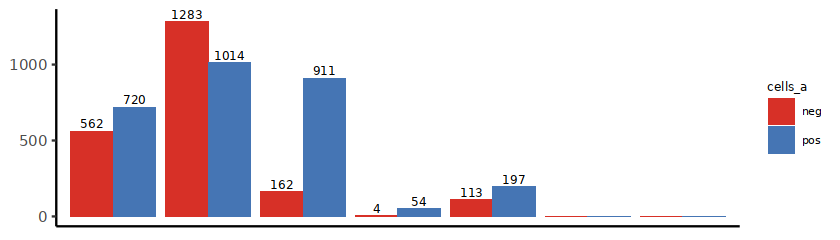

In [18]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d5_other = make_marker_bars(markers_d5_other, cluster_categories, 1300) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other

# A tibble: 14 × 4
   cluster           cells_a          n n_label
   <chr>             <chr>        <int> <chr>  
 1 Astrocytes        neg_restored   171 "171"  
 2 Oligodendrocytes  pos_restored   130 "130"  
 3 Oligodendrocytes  neg_restored   106 "106"  
 4 Tanycytes         neg_restored     0 ""     
 5 Tanycytes         pos_restored     0 ""     
 6 OPC               neg_restored     0 ""     
 7 OPC               pos_restored     0 ""     
 8 Astrocytes        pos_restored     0 ""     
 9 Ependymal_cells   neg_restored     0 ""     
10 Ependymal_cells   pos_restored     0 ""     
11 Microglia         neg_restored     0 ""     
12 Microglia         pos_restored     0 ""     
13 Endothelial_cells neg_restored     0 ""     
14 Endothelial_cells pos_restored     0 ""     


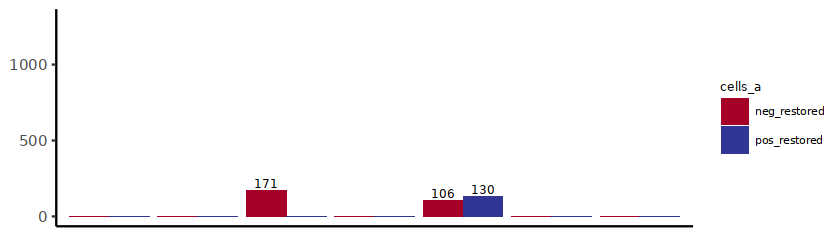

In [19]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d5_other_restored = make_marker_bars(markers_d5_other, cluster_categories, 1300)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other_restored

# A tibble: 14 × 4
   cluster           cells_a     n n_label
   <chr>             <chr>   <int> <chr>  
 1 Oligodendrocytes  pos       409 "409"  
 2 OPC               pos       350 "350"  
 3 Tanycytes         neg         0 ""     
 4 Tanycytes         pos         0 ""     
 5 OPC               neg         0 ""     
 6 Astrocytes        neg         0 ""     
 7 Astrocytes        pos         0 ""     
 8 Ependymal_cells   neg         0 ""     
 9 Ependymal_cells   pos         0 ""     
10 Oligodendrocytes  neg         0 ""     
11 Microglia         neg         0 ""     
12 Microglia         pos         0 ""     
13 Endothelial_cells neg         0 ""     
14 Endothelial_cells pos         0 ""     


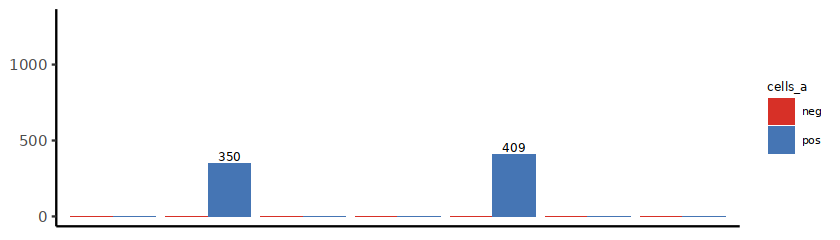

In [20]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other') %>%
bind_rows(tibble(cluster = .$cluster, cells_a = 'neg'))
ggp_d14_other = make_marker_bars(markers_d14_other, cluster_categories, 1300)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_other

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <chr>, n <int>, n_label <chr>


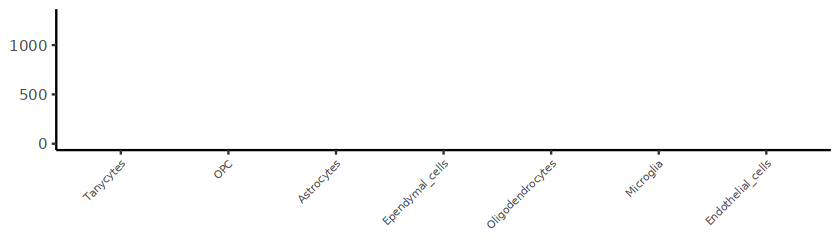

In [21]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')

ggp_d14_other_restored = make_marker_bars(markers_d14_other, cluster_categories, 1300)
ggp_d14_other_restored

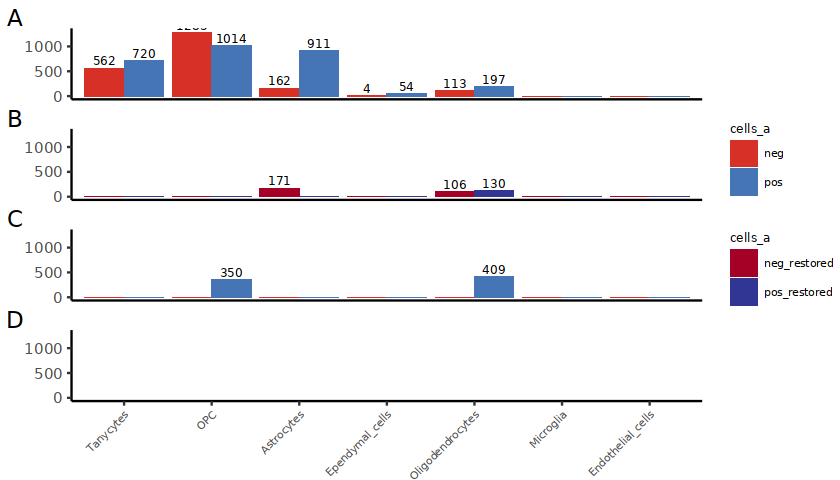

In [22]:
options(repr.plot.width=7, repr.plot.height=4)
layout <- '
A
B
C
D
'
ggp_all_other = wrap_plots(A = ggp_d5_other,
               B = ggp_d5_other_restored,
               C = ggp_d14_other,
               D = ggp_d14_other_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2)) 

ggp_all_other = ggp_all_other + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_other %>% ggsave('deg_count_plot_other.pdf', plot = ., width = 7, height=4)
ggp_all_other

In [23]:
cluster_categories = labels_classes_tib %>% filter(class == 'neuron') %>% pull(cluster)
cluster_categories

[1] "Sst/Pthlh"         "Nfix/Nfib"         "Met/Prlh"         
 [4] "Agrp"              "Sim1"              "Fez1"             
 [7] "Pou6f2/Prkcq/Whrn" "Dlk1"              "Slc17a6/Trhr"     
[10] "Esr1"              "Tmem215/Dach2"     "Sst/Nts"          
[13] "Sst/Unc13c"        "Irx5/Lmx1a"        "Htr3b"            
[16] "Hdc"               "Lepr89"            "Nfib_1"           
[19] "Ppp1r17/Tafa4"     "Lepr67"            "Arx/Nr5a2"        
[22] "Kiss1/Tac2"        "Met/Pappa2"        "Trh/Lef1"         
[25] "Gpr50/Tac2"        "Tmem215/Greb1"     "Ghrh"             
[28] "Trh/Cxcl12"        "Lepr15"            "Pomc/Ttr"         
[31] "Tbx19/Pirt"        "Pomc/Glipr1"       "Pomc/Anxa2"       
[34] "Npsr1/Epha3"       "Nfix/Nfib/Lhx6"    "Reln/Lef1"        
[37] "unassigned(2)"     "Th/Nfib"           "Ppp1r17"          
[40] "Th/Slc6a3"         "Nfib_3"            "Ppp1r17/Ltbp1"    
[43] "Lpar1_oligo"       "Nfib_2"            "Nfix/Nfib/Hgf"

In [24]:
cluster_categories = cluster_categories %>% str_replace('/', '_')

# A tibble: 90 × 4
   cluster   cells_a     n n_label
   <chr>     <chr>   <int> <chr>  
 1 Agrp      pos       885 "885"  
 2 Htr3b     neg       735 "735"  
 3 Agrp      neg       688 "688"  
 4 Htr3b     pos       682 "682"  
 5 Ghrh      neg       167 "167"  
 6 Ghrh      pos        58 "58"   
 7 Sst_Pthlh neg         0 ""     
 8 Sst_Pthlh pos         0 ""     
 9 Nfix_Nfib neg         0 ""     
10 Nfix_Nfib pos         0 ""     
# ℹ 80 more rows


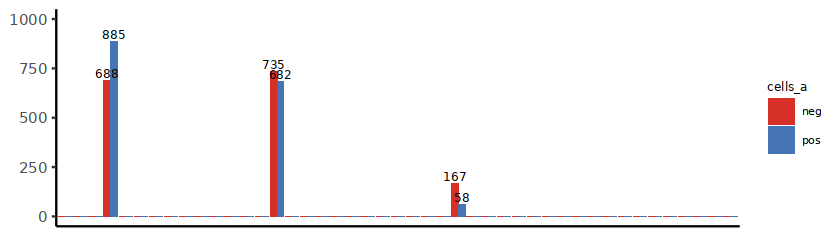

In [25]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron = make_marker_bars(markers_d5_neuron, cluster_categories, 1000) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron

# A tibble: 90 × 4
   cluster   cells_a          n n_label
   <chr>     <chr>        <int> <chr>  
 1 Agrp      pos_restored   914 "914"  
 2 Agrp      neg_restored   688 "688"  
 3 Htr3b     pos_restored   433 "433"  
 4 Ghrh      neg_restored   167 "167"  
 5 Ghrh      pos_restored    58 "58"   
 6 Sst_Pthlh neg_restored     0 ""     
 7 Sst_Pthlh pos_restored     0 ""     
 8 Nfix_Nfib neg_restored     0 ""     
 9 Nfix_Nfib pos_restored     0 ""     
10 Met_Prlh  neg_restored     0 ""     
# ℹ 80 more rows


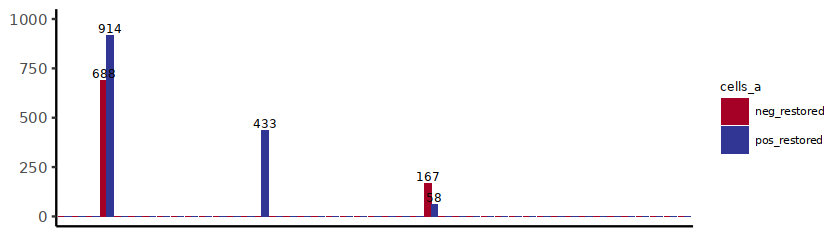

In [26]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron_restored = make_marker_bars(markers_d5_neuron, cluster_categories, 1000)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron_restored

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <chr>, n <int>, n_label <chr>


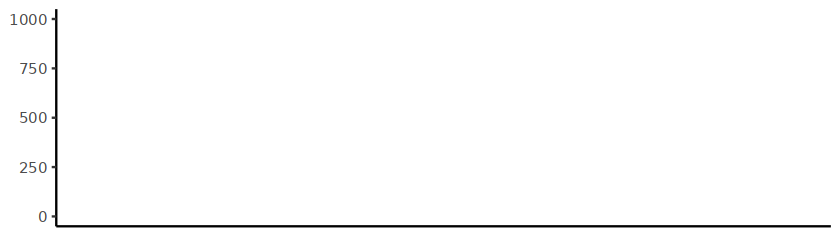

In [27]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d14_neuron = make_marker_bars(markers_d14_neuron, cluster_categories, 1000)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_neuron

# A tibble: 0 × 4
# ℹ 4 variables: cluster <chr>, cells_a <fct>, n <int>, n_label <chr>


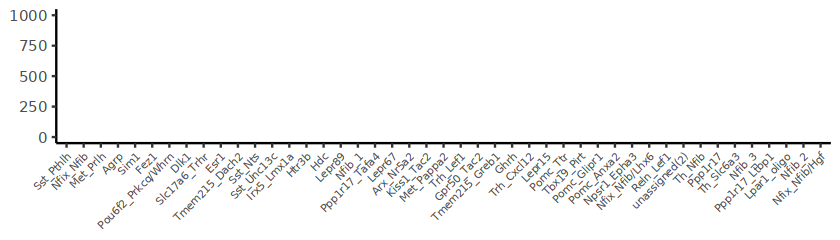

In [28]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    mutate(cells_a = factor(cells_a, levels=c('neg_restored', 'pos_restored'))) %>%
    filter(class == 'neuron')
ggp_d14_neuron_restored = make_marker_bars(markers_d14_neuron, cluster_categories, 1000)
ggp_d14_neuron_restored

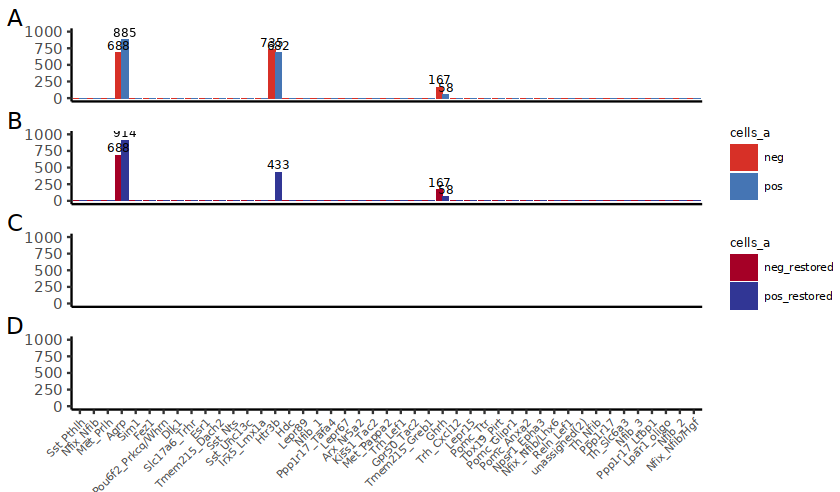

In [29]:
options(repr.plot.width=7, repr.plot.height=4.1)
layout <- '
A
B
C
D
'
ggp_all_neuron = wrap_plots(A = ggp_d5_neuron,
               B = ggp_d5_neuron_restored,
               C = ggp_d14_neuron,
               D = ggp_d14_neuron_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))  

# + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron = ggp_all_neuron + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron %>% ggsave('deg_count_plot_neuron.pdf', plot = ., width = 7, height=4)
ggp_all_neuron

In [30]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Fgfr'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
g1___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,g1,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Fgfr1,7.707407e-06,0.01214799,0.903,0.856,1.541481e-02,ENSMUSG00000031565,0.0220129,TRUE
g3___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,g3,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr3,6.610053e-53,0.96584964,0.814,0.554,1.322011e-49,ENSMUSG00000054252,47.2095378,TRUE


In [31]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Fgfr'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
g1___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,g1,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Fgfr1,7.707407e-06,0.01214799,0.903,0.856,1.541481e-02,ENSMUSG00000031565,0.0220129,TRUE
g3___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,g3,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr3,6.610053e-53,0.96584964,0.814,0.554,1.322011e-49,ENSMUSG00000054252,47.2095378,TRUE


In [32]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Tcf7l2'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
g1___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,g1,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,9.307400e-31,0.4161809,0.990,0.960,1.861480e-27,ENSMUSG00000024985,11.124573,TRUE
g3___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,g3,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Tcf7l2,5.005981e-14,0.3851026,0.858,0.821,1.001196e-10,ENSMUSG00000024985,3.850826,TRUE
g3___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,g3,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,2.111383e-128,3.5690083,0.905,0.821,4.222766e-125,ENSMUSG00000024985,443.893277,TRUE
n0___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,n0,NA,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Tcf7l2,1.090652e-19,1.4120105,0.649,0.515,2.181304e-16,ENSMUSG00000024985,22.113897,NA
n0___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,n0,NA,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Tcf7l2,1.656956e-34,1.6139272,0.699,0.484,3.313911e-31,ENSMUSG00000024985,49.191951,TRUE
neuron___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,neuron,NA,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Tcf7l2,6.706580e-08,0.7097013,0.537,0.476,1.341316e-04,ENSMUSG00000024985,2.748296,NA
neuron___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.pos_vs_none,all,neuron,NA,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,pos,none,Tcf7l2,3.675057e-13,0.3885446,0.511,0.440,7.350115e-10,ENSMUSG00000024985,3.548852,NA
OPC___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,OPC,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Tcf7l2,3.614760e-48,0.5743922,0.965,0.946,7.229521e-45,ENSMUSG00000024985,25.354184,TRUE
OPC___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,OPC,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,3.822796e-116,3.7479734,0.984,0.946,7.645592e-113,ENSMUSG00000024985,420.209996,TRUE


In [33]:
combined_deg_seurat %>% filter(cluster == 'Agrp') %>% arrange(p_val_adj)

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Unc5c,2.769942e-128,1.3046939,1.000,0.983,5.539884e-125,ENSMUSG00000059921,162.11670,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Grik2,4.041328e-127,0.7971532,0.997,0.998,8.082657e-124,ENSMUSG00000056073,98.12354,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Syt1,7.165929e-126,1.2361393,1.000,0.990,1.433186e-122,ENSMUSG00000035864,150.61578,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Nlgn1,5.090124e-124,0.9141259,0.997,0.989,1.018025e-120,ENSMUSG00000063887,109.68801,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Il1rapl1,1.289139e-118,1.1229104,0.997,0.985,2.578278e-115,ENSMUSG00000052372,128.67281,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Cntn5,1.409125e-118,1.7448076,0.992,0.968,2.818250e-115,ENSMUSG00000039488,199.86775,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Zfp804a,5.345269e-117,1.8924364,0.974,0.939,1.069054e-113,ENSMUSG00000070866,213.79043,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Grin2b,7.453636e-116,0.8165080,1.000,0.988,1.490727e-112,ENSMUSG00000030209,91.30731,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Celf2,1.049460e-115,1.0098037,0.988,0.971,2.098919e-112,ENSMUSG00000002107,112.77287,TRUE


In [34]:
combined_deg_seurat %>% write_xlsx('combined_deg_seurat_d5_d14.xlsx')